In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from keras.models import load_model
from keras import models, layers
import tensorflow as tf
import cv2
import numpy as np

In [ ]:
PATH_tablet = '../gdrive/MyDrive/공모전용/HW-OCR/4.Validaiton/tablet/R.Free/전처리/'

In [ ]:
X_train, X_test, Y_train, Y_test = np.load('../gdrive/MyDrive/공모전용/HW-OCR/data_1.npy', allow_pickle = True)

In [ ]:
X_train = X_train.reshape((142719, 48, 48, 1))
X_test = X_test.reshape((47574, 48, 48, 1))

In [ ]:
X_train.shape

(142719, 48, 48, 1)

In [ ]:
from tensorflow.keras import layers

In [ ]:
def VGG16_model():
  tf.random.set_seed(2)
  model = tf.keras.models.Sequential([
    # Conv 1
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', input_shape=(48,48,1), name='conv1_1'),
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', name='conv1_2'),
    layers.MaxPool2D((2,2), padding='same', name='conv1_MaxPool'),
    # Conv 2
    layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv2_1'),
    layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv2_2'),
    layers.MaxPool2D((2,2), padding='same', name='conv2_MaxPool'),
    # Conv3
    layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv3_1'),
    layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', name='conv3_2'),
    layers.MaxPool2D((2,2), padding='same', name='conv3_MaxPool'),

    # Flatten
    layers.Flatten(),
    # Dropout
    layers.Dropout(0.3),
    # FC1
    layers.Dense(512, activation='relu'),
    # output
    layers.Dense(968, activation='softmax'),
    ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
  return model

In [ ]:
model = VGG16_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 conv1_MaxPool (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2_1 (Conv2D)            (None, 24, 24, 128)       73856     
                                                                 
 conv2_2 (Conv2D)            (None, 24, 24, 128)       147584    
                                                                 
 conv2_MaxPool (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                    

In [ ]:
import time

In [ ]:
start_time = time.time()
hist = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.2)
print(f"--- time : {time.time() - start_time} sec ---")

In [ ]:
model.save('../gdrive/MyDrive/공모전용/HW-OCR/vgg_cnn.h5', save_format='h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('../gdrive/MyDrive/공모전용/HW-OCR/vgg_cnn.h5')

In [ ]:
socre = model.evaluate(X_test, Y_test)
print('\nTest Score : ',socre[0])
print('Test Accuracy : ',socre[1])

1487/1487 [==============================] - 7s 5ms/step - loss: 0.4676 - acc: 0.9298

Test Score :  0.467620849609375
Test Accuracy :  0.9297725558280945


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
Y_test = np.argmax(Y_test, axis=1)
y_pred = hist.predict_classes(Y_train)
result = classification_report(Y_test, y_pred)
print(result)

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt

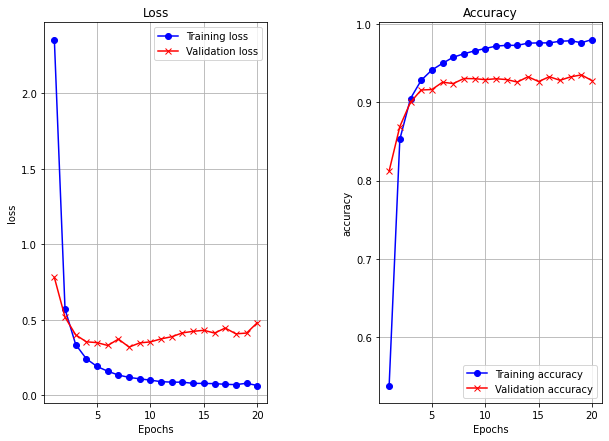

In [ ]:
loss = hist.history['loss']
acc = hist.history['acc']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']
epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rx-', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'rx-', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend()

In [ ]:
predictions = model.predict(X_val)

In [ ]:
class_names = os.listdir('../gdrive/MyDrive/공모전용/HW-OCR/4.Validaiton/tablet/R.Free/전처리/')

In [ ]:
def plot_image(i, predictions_array, true_label, img, image_num):


  predictions_array, true_label, img = predictions_array[image_num], true_label[image_num], img[image_num]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  
  if predicted_label == np.argmax(true_label):
    color = 'blue'
  else:
    color = 'red'

  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[np.argmax(true_label)]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label, image_num):
  predictions_array, true_label = predictions_array[image_num], true_label[image_num]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(4), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('blue')

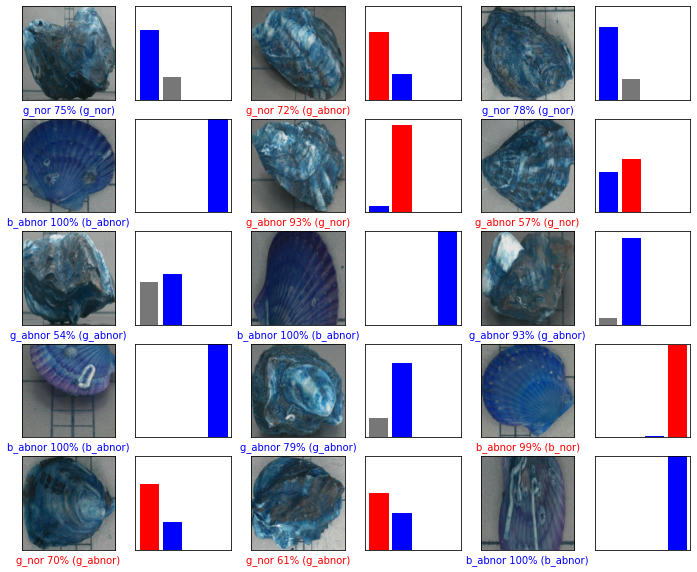

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))



for i in range(num_images):
  image_num = np.random.randint(len(predictions))
  
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, Y_test, X_test,image_num)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, Y_test,image_num)
plt.show()